# Programa de Classificação de Imagens Utilizando Histogramas Verticais e Horizontais

## Objetivo do Programa

Este programa tem como objetivo classificar imagens de caracteres com base na comparação dos histogramas verticais e horizontais das imagens de teste e das imagens de referência (ou treinamento). Utiliza técnicas de processamento de imagem para calcular os histogramas e depois comparar os resultados para identificar o caractere mais próximo da imagem de teste. Além disso, o programa permite visualizar graficamente a comparação dos histogramas, facilitando o entendimento de como a classificação foi realizada.

## Conteúdo Estudado

1. **Pré-processamento de Imagem**:
   - Conversão de uma imagem para escala de cinza, que é usada para simplificar a imagem e reduzir a quantidade de informações a serem processadas.
   - Redimensionamento da imagem para um tamanho padrão, garantindo que as comparações entre histogramas sejam justas.

2. **Binarização de Imagens**:
   - Binarização de uma imagem para destacar as áreas de interesse, facilitando a detecção e cálculo dos histogramas.

3. **Cálculo dos Histogramas**:
   - Histogramas verticais e horizontais são calculados a partir da imagem binarizada, representando a soma dos valores dos pixels em cada coluna e linha da imagem.
   - Normalização dos histogramas para garantir que todas as imagens tenham valores comparáveis, independente de sua intensidade.

4. **Classificação Utilizando Distância Euclidiana**:
   - Comparação dos histogramas da imagem de teste com os histogramas de cada imagem de referência, utilizando a distância Euclidiana. Quanto menor a distância, mais semelhantes são as imagens.

5. **Visualização dos Resultados**:
   - Visualização dos histogramas da imagem de teste em comparação com a imagem de referência mais semelhante, facilitando o entendimento das correspondências e diferenças entre os caracteres.

## Casos de Uso

Este programa pode ser utilizado em diversas situações, tais como:

- **Tags de Identificação Automática**: Em um cenário de identificação de caracteres, como em sistemas de reconhecimento de códigos ou placas de veículos.
- **Digitalização de Documentos**: Identificação de letras e números em formulários digitalizados para automatizar a extração de informações.
- **Reconhecimento de Caracteres em Processos Industriais**: Em linhas de produção, para verificar se as etiquetas ou marcas em produtos são consistentes.

## Estrutura do Programa

1. **Carregamento das Imagens de Referência**: As imagens dos caracteres conhecidos são carregadas do diretório especificado.
2. **Cálculo dos Histogramas das Imagens de Referência**: Para cada imagem de referência, são calculados e armazenados os histogramas verticais e horizontais.
3. **Divisão da Imagem de Teste**: A imagem de teste é dividida em várias partes (fatias) para serem classificadas individualmente.
4. **Classificação das Fatias da Imagem de Teste**: Cada fatia é comparada com os caracteres conhecidos para identificar o caractere mais próximo.
5. **Visualização dos Histogramas**: Após a classificação, o programa exibe os histogramas da imagem de teste e da imagem de referência mais semelhante para comparação visual.

In [1]:
!rm -rf fiap-ml-visao-computacional/

In [2]:
!git clone https://github.com/FIAPON/fiap-ml-visao-computacional.git

Cloning into 'fiap-ml-visao-computacional'...
remote: Enumerating objects: 65143, done.
remote: Counting objects: 100% (1062/1062), done.
remote: Compressing objects: 100% (864/864), done.
remote: Total 65143 (delta 208), reused 1035 (delta 182), pack-reused 64081 (from 1)
Receiving objects: 100% (65143/65143), 704.47 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Updating files: 100% (66612/66612), done.


In [3]:
%cd fiap-ml-visao-computacional/aula-2-transformacao/estudo-caso-histograma/

/content/fiap-ml-visao-computacional/aula-2-transformacao/estudo-caso-histograma


In [4]:
import cv2
import numpy as np
import os
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

# Função para calcular histogramas horizontais e verticais

In [5]:
def calculate_histograms(img):
    # Explicando o que estamos fazendo: Convertendo a imagem para escala de cinza
    # Isso nos ajuda a simplificar a imagem e focar apenas nas informações de luminosidade
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Redimensionando a imagem para um tamanho fixo para padronizar as comparações
    gray = cv2.resize(gray, (78, 71))

    # Calculando o histograma vertical - somando os pixels ao longo de cada coluna
    # Isso nos dá uma ideia da distribuição de elementos em cada coluna
    vertical_hist = np.sum(gray, axis=0).astype(np.float32)

    # Normalizando o histograma para que todas as imagens tenham valores comparáveis
    vertical_hist /= (np.linalg.norm(vertical_hist) + 1e-5)

    # Calculando o histograma horizontal - somando os pixels ao longo de cada linha
    # Isso nos ajuda a ver como os elementos estão distribuídos verticalmente
    horizontal_hist = np.sum(gray, axis=1).astype(np.float32)

    # Normalizando o histograma horizontal
    horizontal_hist /= (np.linalg.norm(horizontal_hist) + 1e-5)

    return vertical_hist, horizontal_hist

# Função para comparar histogramas usando a distância Euclidiana


In [6]:
def compare_histograms(hist1, hist2):
    # Quanto menor a distância, mais semelhantes são os histogramas
    return euclidean(hist1, hist2)

# Função para carregar todas as imagens de um diretório


In [7]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images[filename] = img
    return images

In [20]:
# Diretório contendo as imagens dos caracteres
folder = "template_th/"

# Carregar as imagens do diretório
images = load_images_from_folder(folder)

# Calcular os histogramas para cada imagem do conjunto de treino
image_histograms = {}
for filename, img in images.items():
    vertical_hist, horizontal_hist = calculate_histograms(img)
    image_histograms[filename] = (vertical_hist, horizontal_hist)

# Função para classificar uma nova imagem e visualizar a comparação dos histogramas


In [9]:
def classify_image(test_img, image_histograms):
    # Calcula os histogramas da imagem de teste
    test_vertical_hist, test_horizontal_hist = calculate_histograms(test_img)

    # Inicialização das variáveis de melhor correspondência
    best_match = None
    lowest_distance = float('inf')
    best_vertical_hist = None
    best_horizontal_hist = None

    # Itera sobre todas as imagens conhecidas e calcula a distância
    for filename, (vertical_hist, horizontal_hist) in image_histograms.items():
        vertical_distance = compare_histograms(test_vertical_hist, vertical_hist)
        horizontal_distance = compare_histograms(test_horizontal_hist, horizontal_hist)

        # Soma as distâncias para obter uma medida final
        total_distance = vertical_distance + horizontal_distance

        # Verifica se a distância atual é menor que a menor distância encontrada até agora
        if total_distance < lowest_distance:
            lowest_distance = total_distance
            best_match = filename
            best_vertical_hist = vertical_hist
            best_horizontal_hist = horizontal_hist

    # Visualizar os histogramas da imagem de teste e da melhor correspondência
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Comparando Histograma da Imagem de Teste com: {best_match}")

    # Histograma Vertical
    plt.subplot(2, 2, 1)
    plt.plot(test_vertical_hist, label="Teste - Vertical", color='b')
    plt.title("Histograma Vertical - Imagem de Teste")
    plt.subplot(2, 2, 2)
    plt.plot(best_vertical_hist, label=f"{best_match} - Vertical", color='r')
    plt.title(f"Histograma Vertical - {best_match}")

    # Histograma Horizontal
    plt.subplot(2, 2, 3)
    plt.plot(test_horizontal_hist, label="Teste - Horizontal", color='b')
    plt.title("Histograma Horizontal - Imagem de Teste")
    plt.subplot(2, 2, 4)
    plt.plot(best_horizontal_hist, label=f"{best_match} - Horizontal", color='r')
    plt.title(f"Histograma Horizontal - {best_match}")

    plt.tight_layout()
    plt.show()

    return best_match


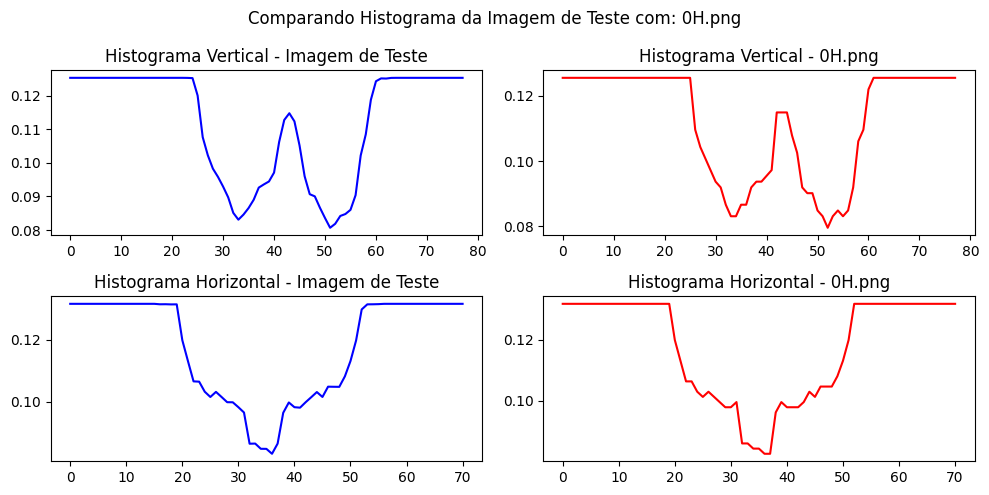

A fatia 1 da imagem de teste foi classificada como: 0H.png


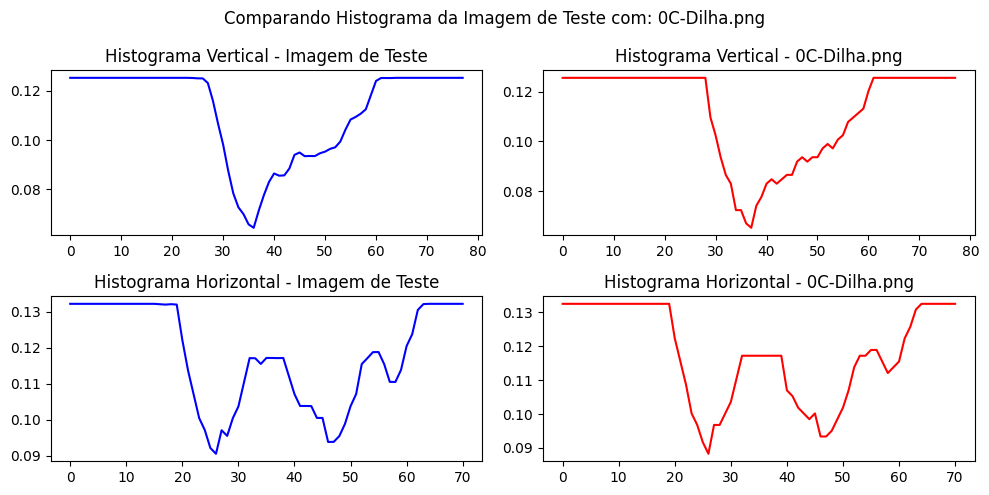

A fatia 2 da imagem de teste foi classificada como: 0C-Dilha.png


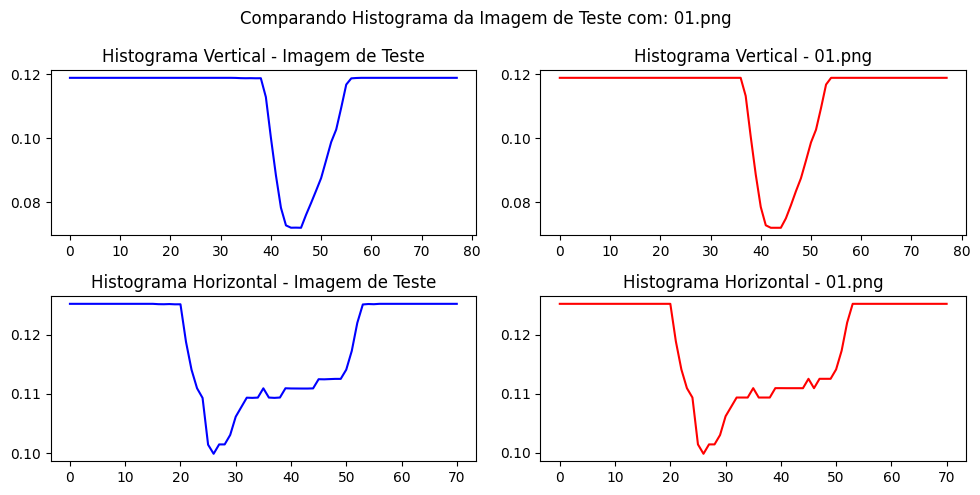

A fatia 3 da imagem de teste foi classificada como: 01.png


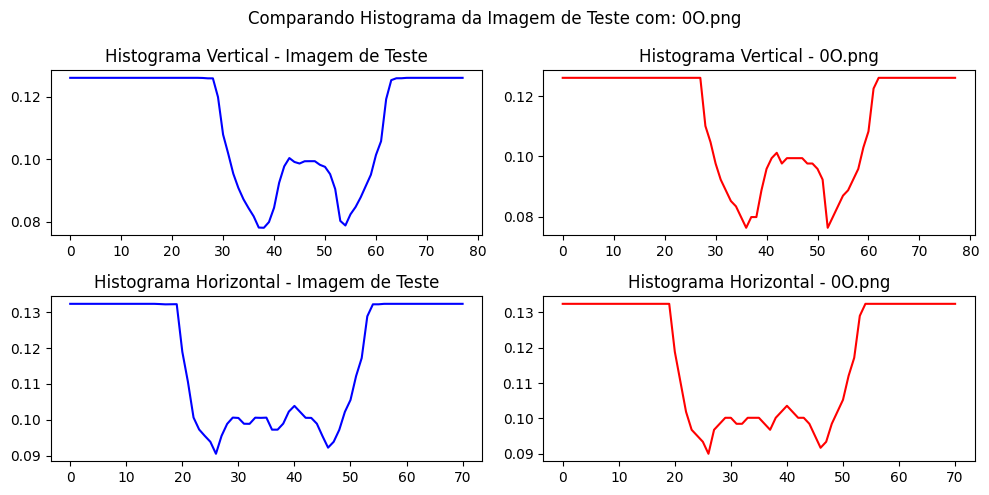

A fatia 4 da imagem de teste foi classificada como: 0O.png


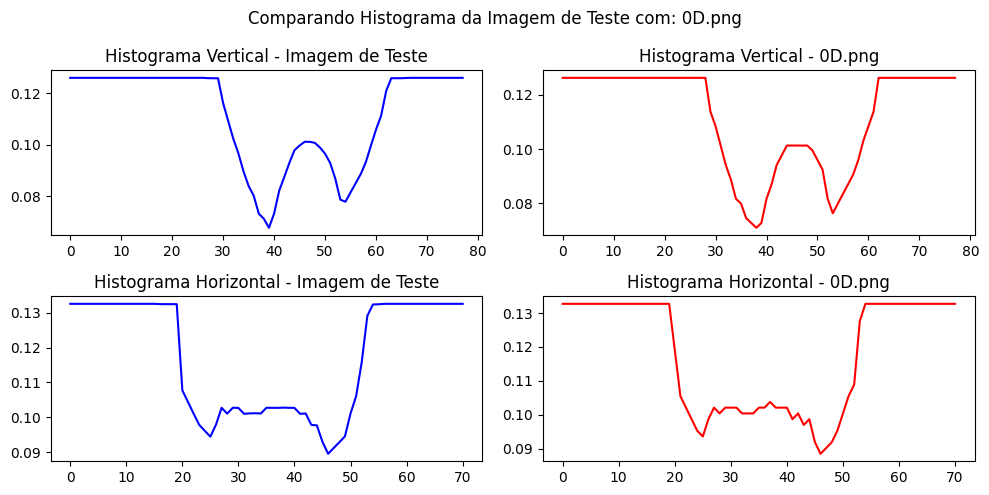

A fatia 5 da imagem de teste foi classificada como: 0D.png


In [22]:
# Caminho para a imagem de teste
test_image_path = "Imagem-1.jpg"
test_img = cv2.imread(test_image_path)

if test_img is not None:
    # Dividir a imagem de teste em 5 fatias iguais
    num_slices = 5
    height, width = test_img.shape[:2]
    slice_width = width // num_slices
    img_slices = []

    # Iteração para dividir a imagem em pedaços menores
    for i in range(num_slices):
        start_x = i * slice_width
        end_x = (i + 1) * slice_width if i < num_slices - 1 else width
        img_slices.append(test_img[0:height, start_x:end_x])

    # Classificar cada fatia da imagem
    for idx, img_slice in enumerate(img_slices):
        result = classify_image(img_slice, image_histograms)
        print(f"A fatia {idx + 1} da imagem de teste foi classificada como: {result}")
else:
    print("Erro ao carregar a imagem de teste.")